# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,QuantileTransformer,RobustScaler
import warnings
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,accuracy_score,classification_report,average_precision_score,f1_score 
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,StackingClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector,SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

In [2]:
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
#importing the assigned dataset and using head() to get an overview of the dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Knowing My Data

In [4]:
# Knowing the size of data and datatype of columns
print("Shape of training data: ",dataset.shape,'\n\n')
print(dataset.dtypes)

Shape of training data:  (54808, 14) 


employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


## Target identification
#### is_promoted is target column and all other columns are features

# Identifying The Missing Values

In [5]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset['employee_id'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
previous_year_rating,4124,0.075244
education,2409,0.043953
is_promoted,0,0.000000
avg_training_score,0,0.000000
awards_won?,0,0.000000
KPIs_met >80%,0,0.000000
length_of_service,0,0.000000
age,0,0.000000
no_of_trainings,0,0.000000
recruitment_channel,0,0.000000


#### Finding the reason behind null value of previous year rating

In [6]:
print(dataset[(dataset['length_of_service']==1) & (dataset['previous_year_rating'].isnull())].shape)
print(dataset[(dataset['length_of_service']==1)].shape)
print(dataset[(dataset['length_of_service']>1) & (dataset['previous_year_rating'].isnull())].shape)
print(dataset['length_of_service'].unique())

(4124, 14)
(4547, 14)
(0, 14)
[ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17 14 13 19 15 23 18 20 22 25
 28 24 31 21 29 30 34 27 33 32 37]


##### As we can see, the amount of null data for previous_year_rating is only for employees who have length of service 1. 
##### But not all people with length of service ==1 have null value 
#### Hence the null value can be imputated by assigning a rating of 0

In [7]:
dataset['previous_year_rating'].fillna(0,inplace=True)

#### Cheking for education column

In [8]:
dataset[(dataset['education'].isnull())]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,14821,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,7684,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,1797,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


##### Since education column is a categorical column and values are missing at random with percentage of missing data is <0.5%, we can replace it with mode of the column

In [9]:
dataset['education'].fillna(dataset['education'].mode()[0], inplace=True)

In [10]:
# verifying
dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Finding Duplicate Columns

In [11]:
# Dropping the columns
# dataset = dataset.T
# dataset.drop_duplicates(keep='last',inplace=True)
# dataset = dataset.T
# print("Shape of data: ",dataset.shape,'\n\n')

# Finding Constant Columns

In [12]:
# Finding which columns are constant, here we can see how many unique values are there in each column
dataset.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [13]:
# Verifying shape of dataset and if there remain any duplicacies or not
print("Shape of data: ",dataset.shape,'\n\n')
print(dataset.duplicated().sum())

Shape of data:  (54808, 14) 


0


# Performing Train-Test-Validation Split

### Split Details - train=70%, test=15%, validation=15% 

In [14]:
# creating test set
validation_set1 = dataset.iloc[-8221:,:]
validation_set1.reset_index(inplace=True)
validation_set1.drop('index',axis=1,inplace=True)
print("Shape of validation_set2: ",validation_set1.shape)

Shape of validation_set2:  (8221, 14)


In [15]:
#creating validation set1
validation_set2 = dataset.iloc[-16442:-8221,:]
validation_set2.reset_index(inplace=True)
validation_set2.drop('index',axis=1,inplace=True)
print("Shape of validation_set1: ",validation_set2.shape)

Shape of validation_set1:  (8221, 14)


In [16]:
#for eda purpose
#creating train set
train_set = dataset.iloc[:-16442:,:]
train_set.reset_index(inplace=True)
train_set.drop('index',axis=1,inplace=True)
print("Shape of train_set: ",train_set.shape)

Shape of train_set:  (38366, 14)


## Label Encoding Region To Get Region Number Only

In [17]:
def returnRegion(x):
    return int(x.split("_")[1])

In [18]:
train_set['region'] = train_set['region'].apply(returnRegion)
validation_set1['region'] = validation_set1['region'].apply(returnRegion)
validation_set2['region'] = validation_set2['region'].apply(returnRegion)

In [19]:
train_set

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38361,56923,Procurement,19,Bachelor's,m,sourcing,1,31,4.0,6,0,0,72,0
38362,46203,Technology,23,Master's & above,m,sourcing,1,37,3.0,10,0,0,80,0
38363,7585,Procurement,7,Bachelor's,m,other,1,42,2.0,3,0,0,75,0
38364,45423,Operations,27,Bachelor's,m,other,2,30,3.0,5,0,0,60,0


# Exploring My Data - EDA

## Univariate analysis

### Finding Data Distribution In Features

Text(0.5, 1.0, 'Age distribution')

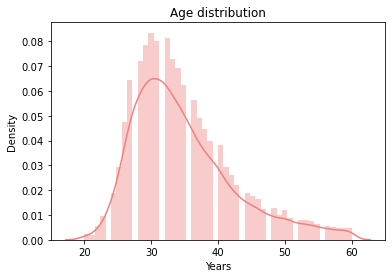

In [20]:
sns.distplot(train_set['age'],color="lightcoral")
plt.xlabel('Years')
plt.title('Age distribution')

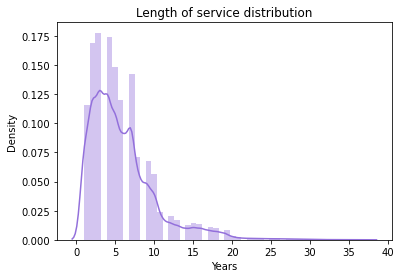

In [21]:
sns.distplot(train_set['length_of_service'],color="mediumpurple")
# checking the distribution of length of service
plt.xlabel('Years')
plt.title("Length of service distribution")
plt.show()

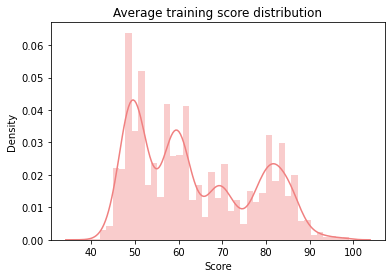

In [22]:
sns.distplot(train_set['avg_training_score'],color="lightcoral")
plt.xlabel('Score')
plt.title("Average training score distribution")
plt.show()

#### Age - Right Skewed
#### Length of service - Heavily Right Skewed
#### Average training score - Multimodal

Q1:  29.0
Q3:  39.0
IQR:  10.0 



<AxesSubplot:xlabel='age'>

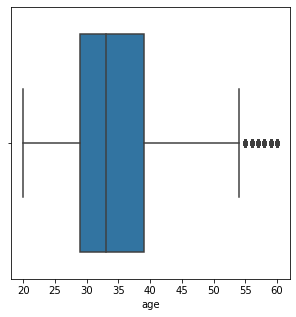

In [23]:
ageQ1 = train_set['age'].quantile(0.25)
ageQ3 = train_set['age'].quantile(0.75)
ageIQR = ageQ3-ageQ1
print("Q1: ",ageQ1)
print("Q3: ",ageQ3)
print("IQR: ",ageIQR,"\n")

plt.figure(figsize=(5,5))
sns.boxplot(x = train_set['age'])

Q1:  51.0
Q3:  76.0
IQR:  25.0 



<AxesSubplot:xlabel='avg_training_score'>

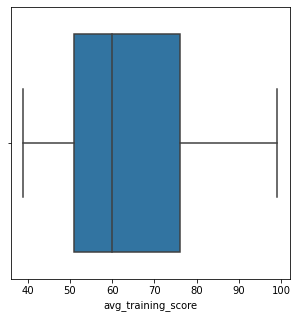

In [24]:
score_Q1 = train_set['avg_training_score'].quantile(0.25)
score_Q3 = train_set['avg_training_score'].quantile(0.75)
score_IQR = score_Q3-score_Q1
print("Q1: ",score_Q1)
print("Q3: ",score_Q3)
print("IQR: ",score_IQR,"\n")

plt.figure(figsize=(5,5))
sns.boxplot(x = train_set['avg_training_score'])

Q1:  3.0
Q3:  7.0
IQR:  4.0 



<AxesSubplot:xlabel='length_of_service'>

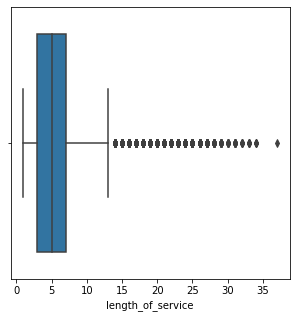

In [25]:
yearQ1 = train_set['length_of_service'].quantile(0.25)
yearQ3 = train_set['length_of_service'].quantile(0.75)
yearIQR = yearQ3-yearQ1
print("Q1: ",yearQ1)
print("Q3: ",yearQ3)
print("IQR: ",yearIQR,"\n")

plt.figure(figsize=(5,5))
sns.boxplot(x = train_set['length_of_service'])

#### The above boxplots were plotted to find the presence of outliers since the distribution was not Gaussian

## Countplots

### Count of gender

In [26]:
train_set['gender'].value_counts().rename_axis('gender').to_frame('count of employee')

,count of employee
gender,
m,26942
f,11424


<AxesSubplot:xlabel='gender', ylabel='count'>

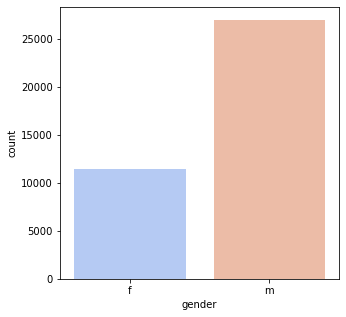

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_set,x=train_set['gender'],palette='coolwarm')

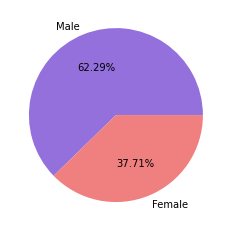

In [28]:
number = [26942, 16312]
labels = ["Male", "Female"]
colors = ( "mediumpurple", "lightcoral")
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### This implies a gender gap in the firm

### Count of employees in each department

In [29]:
train_set['department'].value_counts().rename_axis('department').to_frame('count of employee')

,count of employee
department,
Sales & Marketing,11752
Operations,7898
Technology,5001
Procurement,4977
Analytics,3775
Finance,1781
HR,1700
Legal,757
R&D,725


<AxesSubplot:xlabel='department', ylabel='count'>

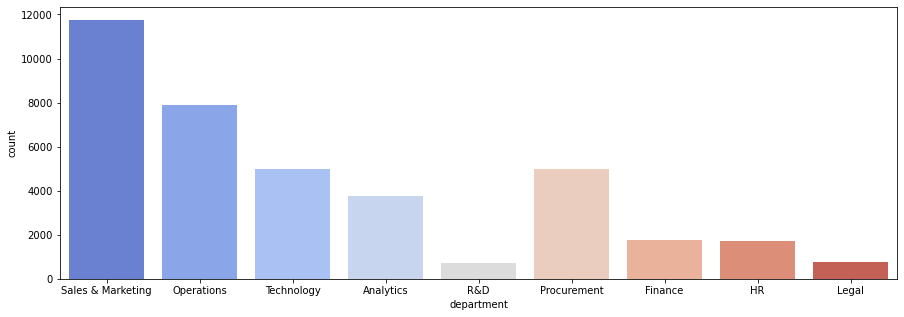

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(data=train_set,x=train_set['department'],palette="coolwarm")

##### Maximum number of employee are associated with Sales & Marketing Team

### Count of employees region wise

In [31]:
train_set['region'].value_counts().rename_axis('region').to_frame('count of employees')

,count of employees
region,
2,8608
22,4506
7,3369
15,1938
13,1890
26,1581
31,1364
4,1220
27,1147


<AxesSubplot:xlabel='region', ylabel='count'>

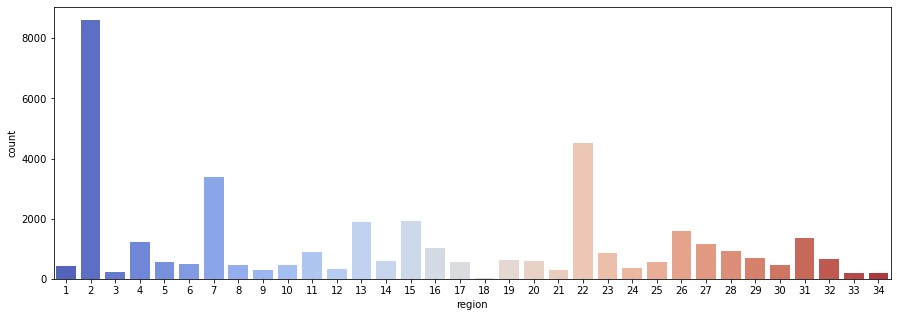

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data=train_set,x=train_set['region'],palette='coolwarm')

##### Max employee belong to region 2 and least number of employees are from region 18

### Count of employees belonging to each education class

In [33]:
train_set['education'].value_counts().rename_axis('education').to_frame('count of employees')

,count of employees
education,
Bachelor's,27405
Master's & above,10414
Below Secondary,547


<AxesSubplot:xlabel='education', ylabel='count'>

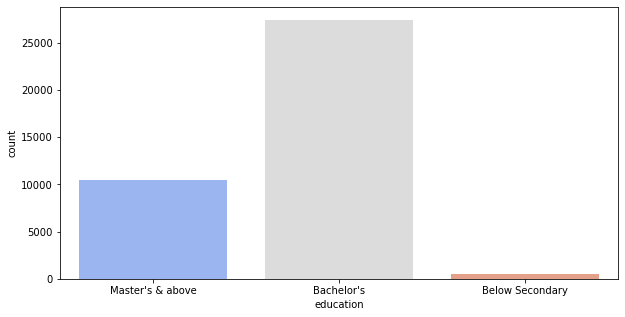

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_set,x=train_set['education'],palette='coolwarm')

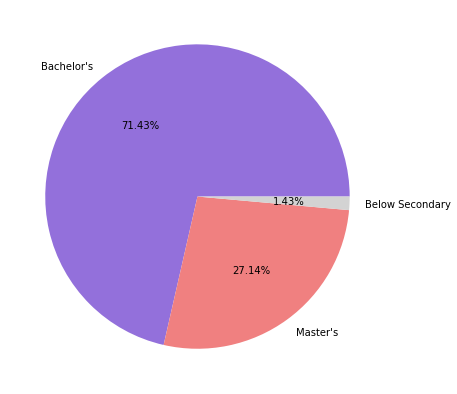

In [35]:
plt.figure(figsize=(7,7))
number = [27405, 10414,547]
labels = ['Bachelor\'s','Master\'s','Below Secondary']
colors = ( "mediumpurple", "lightcoral",'lightgray')
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### Maximum employees in the firm have an education upto Bachelor's

### Count of employees on basis of their recruitment process

In [36]:
train_set['recruitment_channel'].value_counts().rename_axis('recruitment channel').to_frame('count of employees')

,count of employees
recruitment channel,
other,21353
sourcing,16221
referred,792


<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

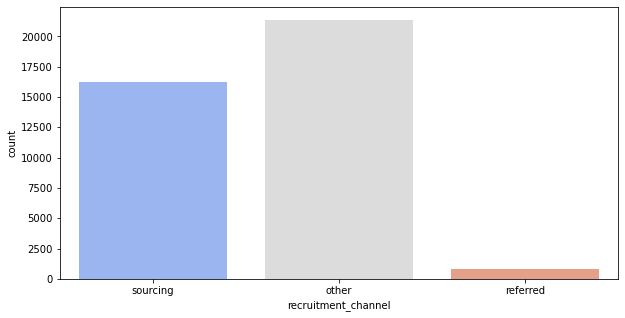

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_set,x=train_set['recruitment_channel'],palette='coolwarm')

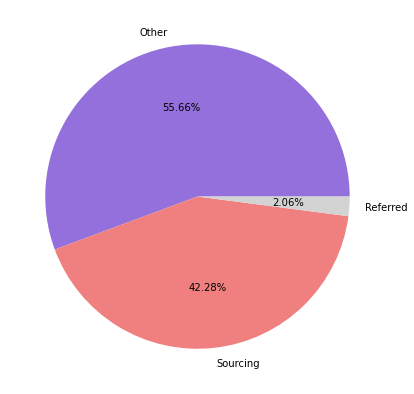

In [38]:
plt.figure(figsize=(7,7))
number = [21353,16221,792]
labels = ['Other','Sourcing','Referred']
colors = ( "mediumpurple", "lightcoral",'lightgray')
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### Maximum employees in the firm have been recruited through recruitment channels and very less number of people have been employeed through referal system. 

### Count of how many trainings have been taken by employees

In [39]:
train_set['no_of_trainings'].value_counts().rename_axis('no. of trainings').to_frame('count of employees')

,count of employees
no. of trainings,
1,31132
2,5589
3,1186
4,321
5,92
6,28
7,6
8,5
10,4


<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

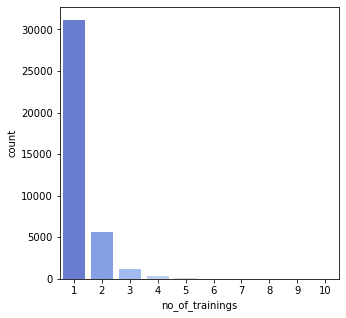

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_set,x=train_set['no_of_trainings'],palette='coolwarm')

##### Maximum employee of the firm have only 1 training

### Count of number of employees with their respective ratings

In [41]:
train_set['previous_year_rating'].value_counts().rename_axis('previous year ratings').to_frame('count of employees')

,count of employees
previous year ratings,
3.0,13006
5.0,8251
4.0,6929
1.0,4363
2.0,2909
0.0,2908


<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

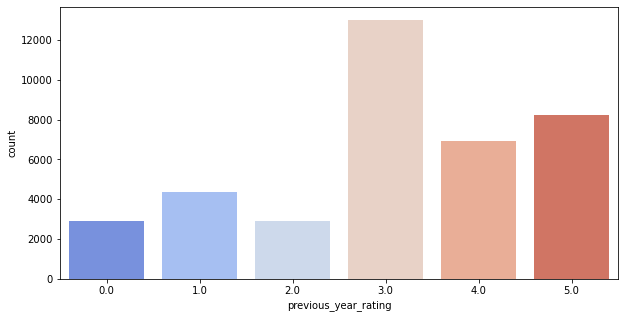

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_set,x=train_set['previous_year_rating'],palette='coolwarm')

##### Most employees in the firm have previous year rating of 3

### Count of employees according to length of service

In [43]:
train_set['length_of_service'].value_counts().rename_axis('length of service').to_frame('count of employees')

,count of employees
length of service,
3,4908
4,4805
2,4675
5,4094
7,3920
6,3305
1,3199
8,1952
9,1862


<AxesSubplot:xlabel='length_of_service', ylabel='count'>

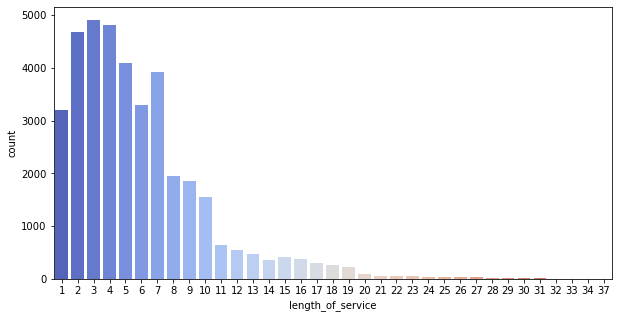

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_set,x=train_set['length_of_service'],palette='coolwarm')

##### There are very few people who are associated with firm for more than 20 years. Maximum employees have a length of service of 2-7 years

### Count of people who were able to meet KPI > 80%

In [45]:
train_set['KPIs_met >80%'].value_counts().rename_axis('KPI > 80%').to_frame('count of employees')

,count of employees
KPI > 80%,
0,24808
1,13558


<AxesSubplot:xlabel='KPIs_met >80%', ylabel='count'>

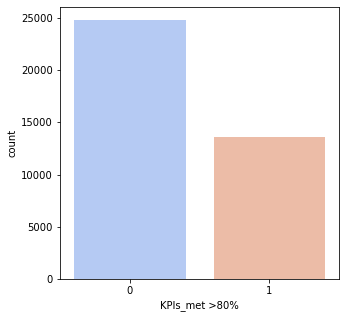

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_set,x=train_set['KPIs_met >80%'],palette='coolwarm')

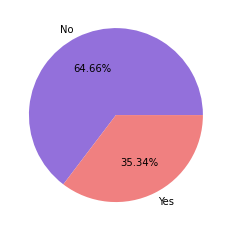

In [47]:
number = [24808, 13558]
labels = ["No", "Yes"]
colors = ( "mediumpurple", "lightcoral")
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### Only 35.34% of employees were able to have a KPI > 80%

### Count of people based on their average training score

In [48]:
train_set['avg_training_score'].value_counts().rename_axis('average training score').to_frame('count of employees')

,count of employees
average training score,
50,1883
49,1874
48,1710
51,1624
60,1471
...,...
99,22
98,19
41,14


<AxesSubplot:xlabel='avg_training_score', ylabel='count'>

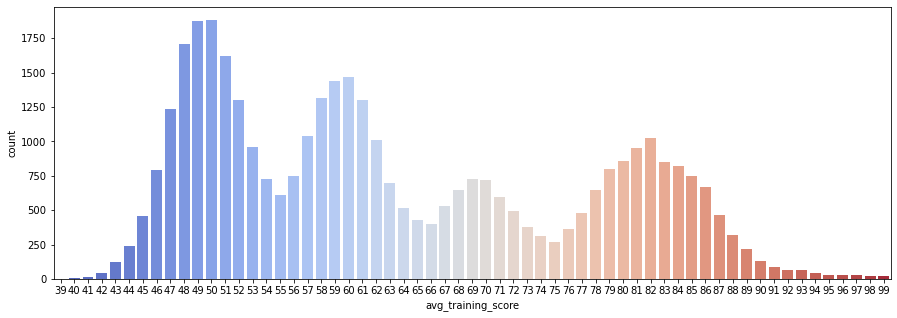

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(data=train_set,x=train_set['avg_training_score'],palette='coolwarm')

### Count of people who have awards

In [50]:
train_set['awards_won?'].value_counts().rename_axis('is promoted').to_frame('count of employees')

,count of employees
is promoted,
0,37487
1,879


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

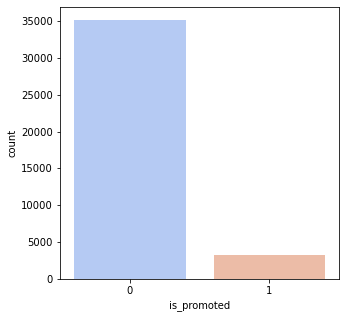

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_set,x=train_set['is_promoted'],palette='coolwarm')

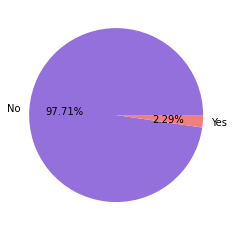

In [52]:
number = [37487,879]
labels = ["No", "Yes"]
colors = ( "mediumpurple", "lightcoral")
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### 97.71% of employees haven't won any awards yet.

### Count of people who were promoted

In [53]:
train_set['is_promoted'].value_counts().rename_axis('is promoted').to_frame('count of employees')

,count of employees
is promoted,
0,35130
1,3236


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

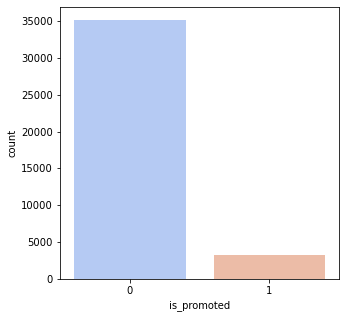

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_set,x=train_set['is_promoted'],palette='coolwarm')

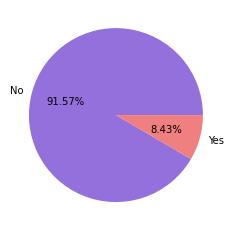

In [55]:
number = [35130,3236]
labels = ["No", "Yes"]
colors = ( "mediumpurple", "lightcoral")
plt.pie(number, labels = labels,colors=colors,autopct = "%.2f%%")
plt.show()

##### Around 8.4% of employees have been promoted in the firm. The factors that have an impact on the promotion will be analysed further.

### Correlation Analysis

<AxesSubplot:>

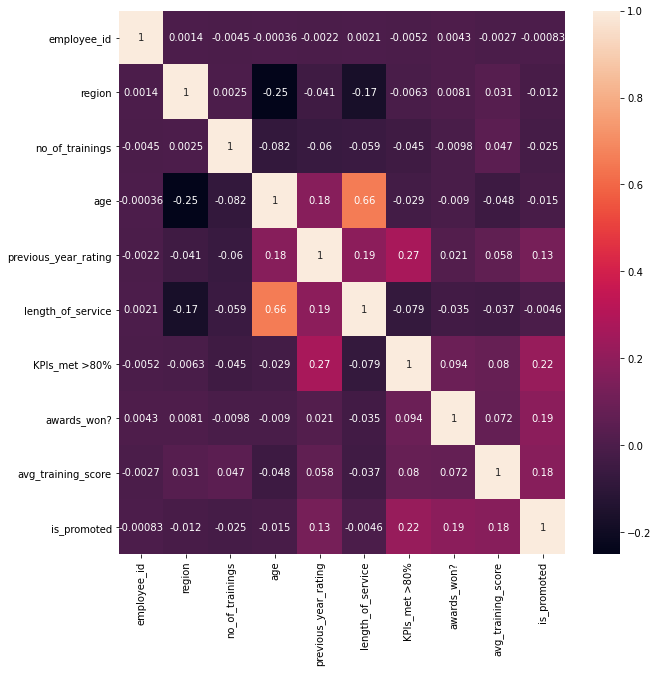

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),annot=True)

##### A moderate positive relationship (coefficient value ~=0.6) can be seen between age and length of service

### Analysing factors affecting promotion

In [57]:
class analyzePromotion:
    def __init__(self,row1,row2):
        self.row1 = row1
        self.row2 = row2
        
    def df(self):
        self.dframe = train_set.groupby([self.row1,self.row2])[self.row2].agg(['count']).unstack()
        self.dframe['percentage_of_employees_promoted'] = 100*self.dframe['count'][1]/(self.dframe['count'][1]+self.dframe['count'][0])
        self.dframe.drop(['count'],axis=1,inplace=True)
#         self.dframe
        return self.dframe
        
    
    def dfplot(self,color):
        self.dframe.plot(kind='bar',legend=False,color=color)

#### Department wise promotion

In [58]:
data1 = analyzePromotion('department','is_promoted')
data1.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
department,
Technology,10.737852
Procurement,9.704641
Operations,9.204862
Analytics,9.086093
Finance,7.804604
Sales & Marketing,7.088155
R&D,6.206897
HR,5.647059


<AxesSubplot:xlabel='department'>

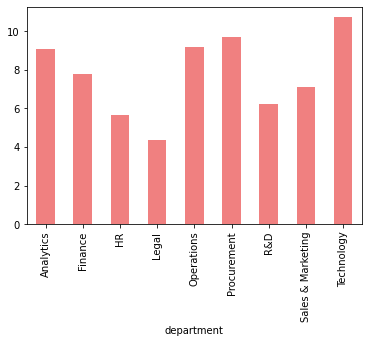

In [59]:
data1.df().plot(kind='bar',legend=False,color='lightcoral')

##### Presented above is a table and graph presenting how the number of employees promoted varies between different departments of the firm. Clearly we can see that employees in technical department have a better chance of promotion and employees in legal department have a less chance of getting promoted

#### Region wise promotion

In [60]:
data2 = analyzePromotion('region','is_promoted')
data2.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
region,
4,14.918033
17,13.285458
28,12.039046
25,11.826087
22,11.340435
7,10.388839
23,10.332542
1,10.208817


<AxesSubplot:xlabel='region'>

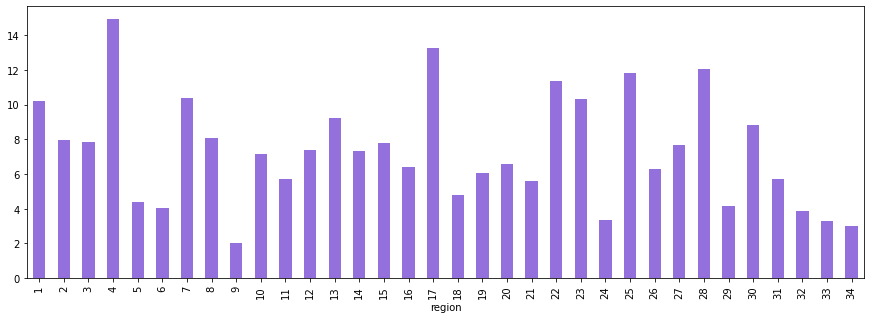

In [61]:
data2.df().plot(kind='bar',legend=False,figsize=(15,5),color='mediumpurple')

##### From the dataframe and the graph, it is clearly visible that percentage of promoted employees from region4 are maximum where as least percentage belongs to region9  

#### Promotions based on education

In [62]:
data3 = analyzePromotion('education','is_promoted')
data3.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
education,
Master's & above,9.842520
Bachelor's,7.918263
Below Secondary,7.495430


<AxesSubplot:xlabel='education'>

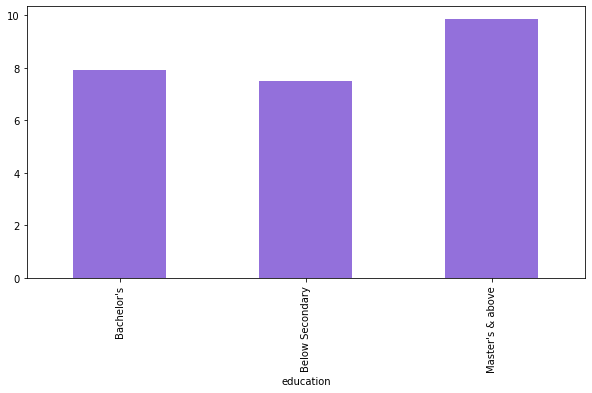

In [63]:
data3.df().plot(kind='bar',legend=False,figsize=(10,5), color='mediumpurple')

##### From the above dataframe and the graph, we can clearly see that education level of Bachelor's and Below Secondary have almost same percentage of promotions, while employees with Master's & Above have been given a bit more weightage.

#### Trend in promotion due to gender gap

In [64]:
data4 = analyzePromotion('gender','is_promoted')
data4.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
gender,
f,8.954832
m,8.213941


<AxesSubplot:xlabel='gender'>

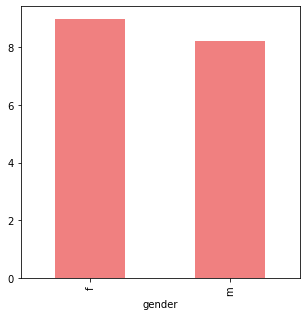

In [65]:
data4.df().plot(kind='bar',legend=False,figsize=(5,5),color='lightcoral')

##### Even after a big gender gap (refer to univariate analysis of gender count), the number of promotions is not affected by the gender of employee. From the above data and graph we can clearly see that both male and female have an equal chance of getting promotion.

#### Effect of number of trainings on promotion of employees

In [66]:
data5 = analyzePromotion('no_of_trainings','is_promoted')
data5.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
no_of_trainings,
1,8.730567
3,7.419899
2,7.371623
4,4.672897
6,3.571429
5,2.173913
7,NaN
8,NaN


<AxesSubplot:xlabel='no_of_trainings'>

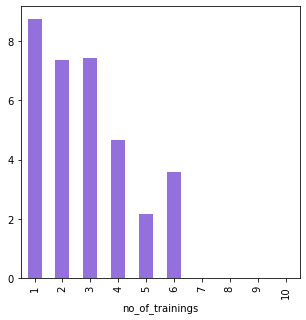

In [67]:
data5.df().plot(kind='bar',legend=False,figsize=(5,5),color='mediumpurple')

##### From the above graph and dataframe we can clearly derive that percentage of promoted employees with 1 training is very high. People with more than 6 trainings have not been promoted

#### Effect of age of an employee on getting promotion

In [68]:
data6 = analyzePromotion('age','is_promoted')
data6.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
age,
35,10.312500
38,10.284464
28,9.719711
27,9.701870
58,9.589041
33,9.472744
59,9.459459
37,9.024552


<AxesSubplot:xlabel='age'>

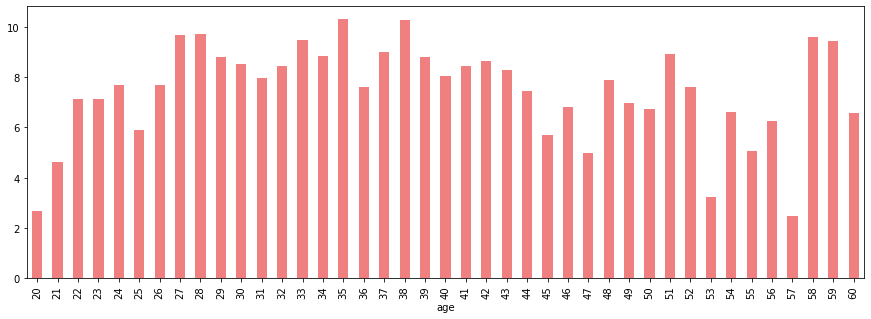

In [69]:
data6.df().plot(kind='bar',legend=False,figsize=(15,5),color='lightcoral')

##### From the above dataframe and graph, we can deduce that age alone cannot have any influence on promotion. Employees are not promoted just on the basis of age. Other factors come in play which is very good sign of growth of both employee and firm. Age might affect promotion indirectly (for ex- More experience) with combination of other features but no direct relationship. 

#### Affect of previous year rating on promotion

In [70]:
data7 = analyzePromotion('department','is_promoted')
data7.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
department,
Technology,10.737852
Procurement,9.704641
Operations,9.204862
Analytics,9.086093
Finance,7.804604
Sales & Marketing,7.088155
R&D,6.206897
HR,5.647059


<AxesSubplot:xlabel='department'>

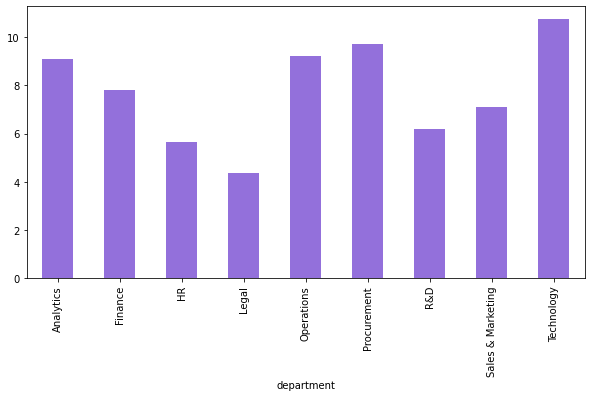

In [71]:
data7.df().plot(kind='bar',legend=False,figsize=(10,5),color='mediumpurple')

##### An employee with previous year rating 5 has a very high chance of getting a promotion while employees with rating 1 have a very less chance of promotion. Rating has a huge role in promotion. 
##### Note- Rating of 0 has been assigned to employees with missing rating after confirming that their length of service is 1 year. This can tell that even new employees can have promotion if their other factors are good enough

#### KPIs met >80% vs Promotion

In [72]:
data8 = analyzePromotion('KPIs_met >80%','is_promoted')
data8.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
KPIs_met >80%,
1,16.772385
0,3.877781


<AxesSubplot:xlabel='KPIs_met >80%'>

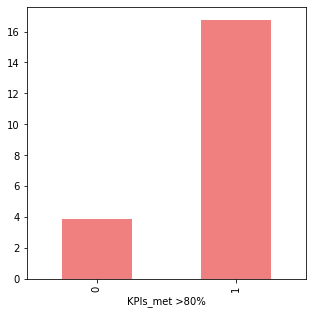

In [73]:
data8.df().plot(kind='bar',legend=False,figsize=(5,5),color='lightcoral')

##### KPI (key performance indicator) creates a big impact on promotion. Both the data frame and the graph clearly indicates that employees who have KPI > 80% have a very big chance of getting promoted as compared to employees not having KPI>80%. 

#### Impact of length of service on promotion

In [74]:
data9 = analyzePromotion('length_of_service','is_promoted')
data9.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
length_of_service,
32,33.333333
34,25.000000
29,17.647059
11,10.889571
23,10.869565
8,9.426230
20,9.278351
19,9.130435


<AxesSubplot:xlabel='length_of_service'>

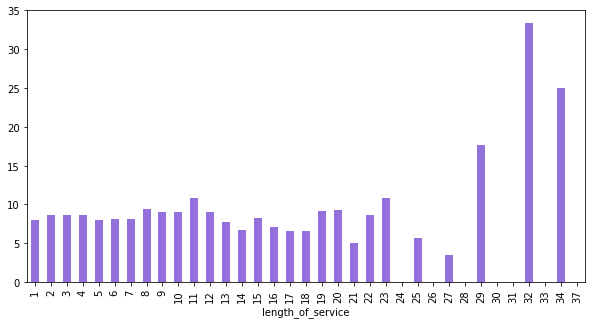

In [75]:
data9.df().plot(kind='bar',legend=False,figsize=(10,5),color='mediumpurple')

##### We can see from the dataframe and graph that the length of service isn't a big factor for promotion. The length of service>=29 have coupled with other factors to show a spike in the result which will be revealed further. 

#### Awards won vs Promotion

In [76]:
data10 = analyzePromotion('awards_won?','is_promoted')
data10.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
awards_won?,
1,42.434585
0,7.637314


<AxesSubplot:xlabel='awards_won?'>

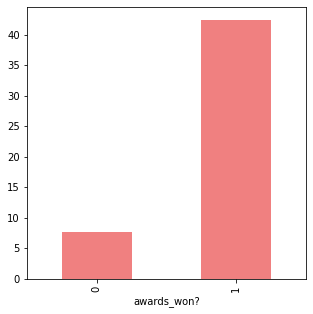

In [77]:
data10.df().plot(kind='bar',legend=False,figsize=(5,5),color='lightcoral')

##### From the dataframe and the graph as well, we can see that people who have won awards have such a high probability of getting a promotion. 42% of employees who have awards have been promoted.

#### Effect of average training score on promotion

In [78]:
data11 = analyzePromotion('avg_training_score','is_promoted')
data11.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
avg_training_score,
94,97.674419
96,96.774194
93,89.062500
92,83.076923
91,65.168539
...,...
40,NaN
95,NaN


<AxesSubplot:xlabel='avg_training_score'>

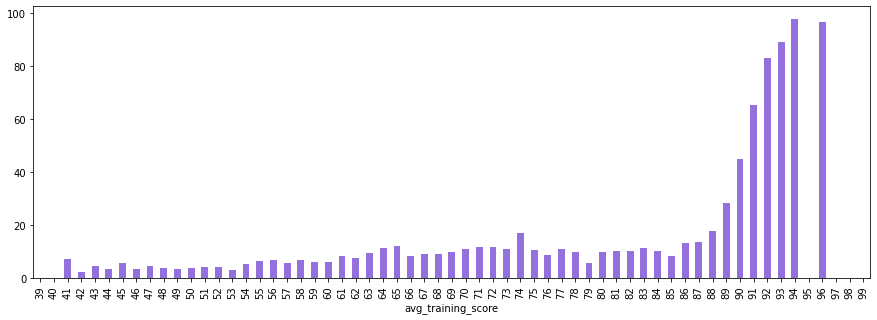

In [79]:
data11.df().plot(kind='bar',legend=False,figsize=(15,5),color='mediumpurple')

##### From the dataframe and graph deduced, it is clearly visible that employees with high average training score have a better chance of getting a promotion. The average training score plays a major role in an employee being promoted. 

#### Promotion trend based on recruitment channel

In [80]:
data12 = analyzePromotion('recruitment_channel','is_promoted')
data12.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
recruitment_channel,
referred,12.373737
sourcing,8.482831
other,8.251768


<AxesSubplot:xlabel='recruitment_channel'>

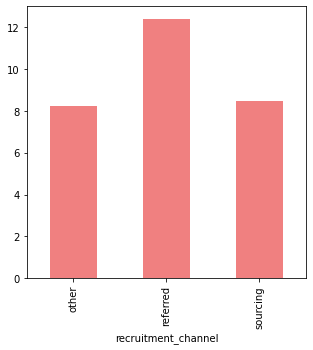

In [81]:
data12.df().plot(kind='bar',legend=False,figsize=(5,5),color='lightcoral')

##### From the above graph and dataframe, we can see that employees recruited based on referrals have a slight better chance of getting a promotion while employees from other channels and sourcing have almost equal opportunities.

### These were the roles of all the features in dataset that determine the promotion of an employee

## Looking for some more insights about performance

### Checking for anomalous promotion of employees

In [82]:
# For a non-deserving candidate : KPI>80==0, rating==1, awards won==0, avg training score<60
# The above conditions are for poor performance of an employee which should result in no promotion in ideal condition

print(train_set[(train_set['KPIs_met >80%'] == 0) & (train_set['previous_year_rating'] == 1.0) & (train_set['awards_won?'] == 0) & (train_set['avg_training_score'] < 60) & (train_set['is_promoted'] == 0)].shape)
print(train_set[(train_set['KPIs_met >80%'] == 0) & (train_set['previous_year_rating'] == 1.0) & (train_set['awards_won?'] == 0) & (train_set['avg_training_score'] < 60) & (train_set['is_promoted'] == 1)].shape)

(2281, 14)
(1, 14)


In [83]:
# 1 candidate found who was promoted. 
train_set[(train_set['KPIs_met >80%'] == 0) & (train_set['previous_year_rating'] == 1.0) & (train_set['awards_won?'] == 0) & (train_set['avg_training_score'] < 60) & (train_set['is_promoted'] == 1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,29663,Sales & Marketing,22,Bachelor's,m,referred,1,27,1.0,2,0,0,58,1


##### With the above given conditions, there are 2281 employees who have not been promoted. But with same conditions 1 candidate was found to be promoted which can either be an error while data entry or a chance of practicing of unfair means. 

In [84]:
# For a deserving candidate : KPI>80==1, rating>=4, awards won==1, avg training score>60
# The above conditions are for good performance of an employee which should result in promotion in ideal condition

print(train_set[(train_set['KPIs_met >80%'] == 1) & (train_set['previous_year_rating'] == 5.0) & (train_set['awards_won?'] == 1) & (train_set['avg_training_score'] >= 90) & (train_set['is_promoted'] == 0)].shape)
print(train_set[(train_set['KPIs_met >80%'] == 1) & (train_set['previous_year_rating'] == 5.0) & (train_set['awards_won?'] == 1) & (train_set['avg_training_score'] >= 90) & (train_set['is_promoted'] == 1)].shape)

(1, 14)
(43, 14)


In [85]:
# 1 candidate found who was promoted. 
train_set[(train_set['KPIs_met >80%'] == 1) & (train_set['previous_year_rating'] == 5.0) & (train_set['awards_won?'] == 1) & (train_set['avg_training_score'] >= 90) & (train_set['is_promoted'] == 0)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
18885,37258,Analytics,12,Bachelor's,m,other,1,31,5.0,3,1,1,90,0


##### All the candidates with ideal condition of promotion have been promoted except the persone in the just above dataframe. Hence this might be considered next for promotion if he keeps performing well

### Department has highest percentage of people with KPI > 80%

In [86]:
df1 = train_set[(train_set['KPIs_met >80%']==1)]
total_in_dept = train_set.groupby(['department'])['department'].agg(['count'])
kpi = df1.groupby(['department'])['department'].agg(['count'])
kpi = kpi.merge(total_in_dept, how='left', on='department').rename(columns={"count_x":"num","count_y":"total"})
kpi['percentage_of_employee'] = 100*kpi['num']/kpi['total']
kpi.sort_values(by=['percentage_of_employee'],ascending=False)

,num,total,percentage_of_employee
department,,,
Operations,3404,7898,43.099519
R&D,301,725,41.517241
Finance,736,1781,41.325098
Analytics,1552,3775,41.112583
Procurement,1881,4977,37.793852
Technology,1721,5001,34.413117
HR,569,1700,33.470588
Legal,253,757,33.421400
Sales & Marketing,3141,11752,26.727366


<AxesSubplot:xlabel='department'>

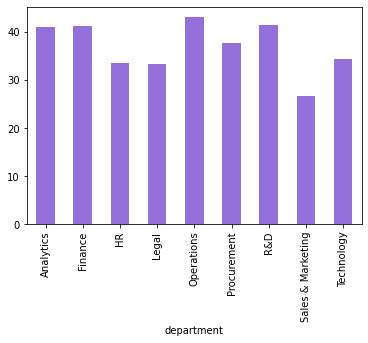

In [87]:
kpi['percentage_of_employee'].plot(kind='bar',color='mediumpurple')

##### From the graph and the dataframe it is evident that Operations department has maximum percentage of people with KPI>80% while Sales & Marketing team has the least percentage

### Department which has the max employees with previous year rating = 5

In [88]:
df2 = train_set[(train_set['previous_year_rating']==5)]
total_in_dept = train_set.groupby(['department'])['department'].agg(['count'])
rate5 = df2.groupby(['department'])['department'].agg(['count'])
rate5 = rate5.merge(total_in_dept, how='left', on='department').rename(columns={"count_x":"num","count_y":"total"})
rate5['percentage_of_employee'] = 100*rate5['num']/rate5['total']
rate5.sort_values(by=['percentage_of_employee'],ascending=False)

,num,total,percentage_of_employee
department,,,
Operations,2268,7898,28.716131
R&D,193,725,26.620690
Analytics,982,3775,26.013245
HR,393,1700,23.117647
Finance,383,1781,21.504773
Legal,157,757,20.739762
Procurement,970,4977,19.489652
Sales & Marketing,2220,11752,18.890402
Technology,685,5001,13.697261


<AxesSubplot:xlabel='department'>

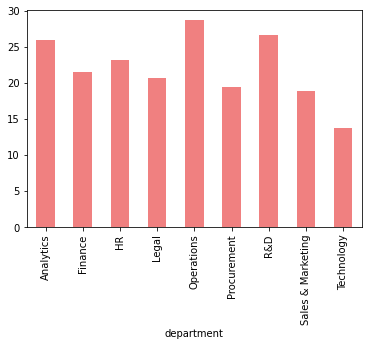

In [89]:
rate5['percentage_of_employee'].plot(kind='bar',color='lightcoral')

##### From the above dataframe and graph we can clearly see that Operations department has highest percentage of people who have previous year rating = 5

### Department with maximum percentage of people winning awards

In [90]:
df3 = train_set[(train_set['awards_won?']==1)]
total_in_dept = train_set.groupby(['department'])['department'].agg(['count'])
award = df3.groupby(['department'])['department'].agg(['count'])
award = award.merge(total_in_dept, how='left', on='department').rename(columns={"count_x":"num","count_y":"total"})
award['percentage_of_employee'] = 100*award['num']/award['total']
award.sort_values(by=['percentage_of_employee'],ascending=False)

,num,total,percentage_of_employee
department,,,
Finance,50,1781,2.807412
Technology,128,5001,2.559488
Legal,19,757,2.509908
R&D,18,725,2.482759
Analytics,90,3775,2.384106
Operations,185,7898,2.342365
Procurement,116,4977,2.330721
Sales & Marketing,243,11752,2.067733
HR,30,1700,1.764706


<AxesSubplot:xlabel='department'>

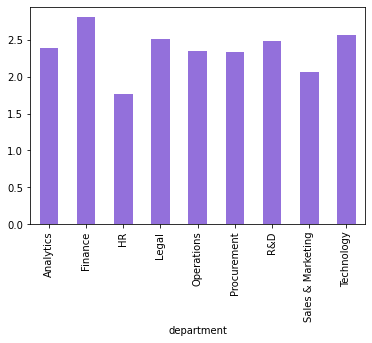

In [91]:
award['percentage_of_employee'].plot(kind='bar',color = 'mediumpurple')

##### The finance department has highest percentage of award winning people while HR department has the lowest

### Department has maximum number of people with length of service > 10 years

In [92]:
df4 = train_set[(train_set['length_of_service']>=10)]
total_in_dept = train_set.groupby(['department'])['department'].agg(['count'])
service_length = df4.groupby(['department'])['department'].agg(['count'])
service_length = service_length.merge(total_in_dept, how='left', on='department').rename(columns={"count_x":"num","count_y":"total"})
service_length['percentage_of_employee'] = 100*service_length['num']/service_length['total']
service_length.sort_values(by=['percentage_of_employee'],ascending=False)

,num,total,percentage_of_employee
department,,,
Operations,1440,7898,18.232464
Procurement,858,4977,17.239301
Sales & Marketing,1814,11752,15.435671
Technology,748,5001,14.957009
HR,253,1700,14.882353
Legal,72,757,9.511229
Analytics,296,3775,7.841060
Finance,123,1781,6.906232
R&D,42,725,5.793103


<AxesSubplot:xlabel='department'>

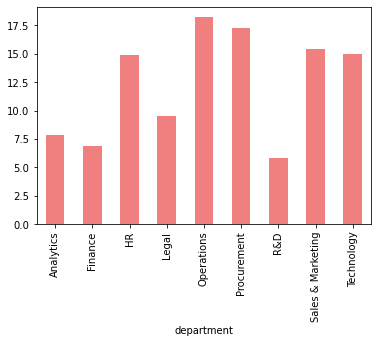

In [93]:
service_length['percentage_of_employee'].plot(kind='bar',color='lightcoral')

##### From the dataframe above, it is clearly visible that the Operations department has maximum percentage of people who have service length equal or more than 10 years

### Department with maximum percentage of employees with master's & above education

In [94]:
df5 = train_set[(train_set['education']=='Master\'s & above')]
total_in_dept = train_set.groupby(['department'])['department'].agg(['count'])
master = df5.groupby(['department'])['department'].agg(['count'])
master = master.merge(total_in_dept, how='left', on='department').rename(columns={"count_x":"num","count_y":"total"})
master['percentage_of_employee'] = 100*master['num']/master['total']
master.sort_values(by=['percentage_of_employee'],ascending=False)

,num,total,percentage_of_employee
department,,,
R&D,319,725,44.000000
Procurement,1760,4977,35.362668
HR,531,1700,31.235294
Technology,1535,5001,30.693861
Operations,2223,7898,28.146366
Sales & Marketing,2861,11752,24.344792
Finance,348,1781,19.539585
Analytics,721,3775,19.099338
Legal,116,757,15.323646


<AxesSubplot:xlabel='department'>

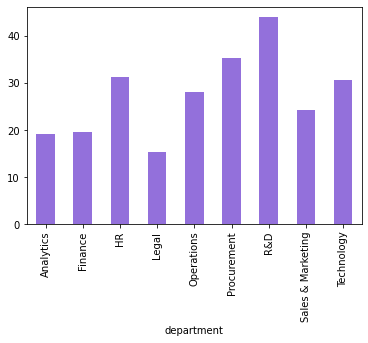

In [95]:
master['percentage_of_employee'].plot(kind='bar',color='mediumpurple')

### Department which has the highest average training score

In [96]:
avg_score_dept = train_set.groupby(['department'])['avg_training_score'].agg(['mean'])
avg_score_dept.sort_values(by='mean',ascending=False)

,mean
department,
R&D,84.699310
Analytics,84.567947
Technology,79.949410
Procurement,70.106490
Operations,60.228919
Finance,60.121280
Legal,59.760898
Sales & Marketing,50.234173
HR,50.012353


<AxesSubplot:xlabel='department'>

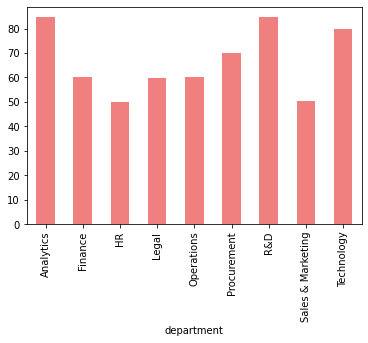

In [97]:
avg_score_dept['mean'].plot(kind='bar',color='lightcoral')

#### Employee who have average training score > the mean training score of their department

In [98]:
deptMean=train_set.groupby('department')['avg_training_score'].mean()
deptMean

department
Analytics            84.567947
Finance              60.121280
HR                   50.012353
Legal                59.760898
Operations           60.228919
Procurement          70.106490
R&D                  84.699310
Sales & Marketing    50.234173
Technology           79.949410
Name: avg_training_score, dtype: float64

In [99]:
train_set['above_avg'] = train_set.apply(lambda row:1 if (row['avg_training_score']>deptMean[row['department']])else 0,axis=1)
validation_set1['above_avg'] = validation_set1.apply(lambda row:1 if (row['avg_training_score']>deptMean[row['department']])else 0,axis=1)
validation_set2['above_avg'] = validation_set2.apply(lambda row:1 if (row['avg_training_score']>deptMean[row['department']])else 0,axis=1)

In [100]:
data13 = analyzePromotion('above_avg','is_promoted')
data13.df().sort_values('percentage_of_employees_promoted',ascending=False)

,percentage_of_employees_promoted
is_promoted,
above_avg,
1,13.065579
0,5.144666


<AxesSubplot:xlabel='above_avg'>

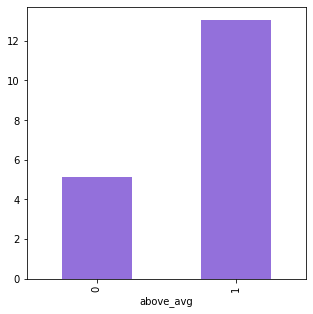

In [101]:
data13.df().plot(kind='bar',legend=False,figsize=(5,5),color='mediumpurple')

### The chances of promotion increase if an employee has an avg training score more than the department average

# Model

In [102]:
x = dataset.drop(['employee_id','is_promoted'],axis=1)
y = dataset['is_promoted']

In [103]:
x = pd.get_dummies(x)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [105]:
x_test.shape

(16443, 58)

In [106]:
x_valid1 = x_test.iloc[:8216,:]
x_valid2 = x_test.iloc[8217:,:]

y_valid1 = y_test.iloc[:8216]
y_valid2 = y_test.iloc[8217:]

In [107]:
x_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
3113,2,26,2.0,3,0,0,77,0,0,0,...,0,0,1,0,0,0,1,1,0,0
118,1,27,4.0,4,1,0,72,0,0,0,...,0,0,1,0,0,1,0,1,0,0
17005,3,34,3.0,6,1,0,56,0,1,0,...,0,0,1,0,0,0,1,1,0,0
14505,2,40,5.0,9,1,0,83,1,0,0,...,0,0,1,0,0,0,1,1,0,0
31487,1,45,3.0,17,0,0,68,0,0,0,...,0,0,1,0,0,0,1,1,0,0


# Feature Scaling

In [108]:
x_train['age'] = x_train['age']/x_train['length_of_service']
x_valid1['age'] = x_valid1['age']/x_valid1['length_of_service']
x_valid2['age'] = x_valid2['age']/x_valid2['length_of_service']

x_train = x_train.drop(['length_of_service'],axis=1)
x_valid1 = x_valid1.drop(['length_of_service'],axis=1)
x_valid2 = x_valid2.drop(['length_of_service'],axis=1)

0.6225663857031769

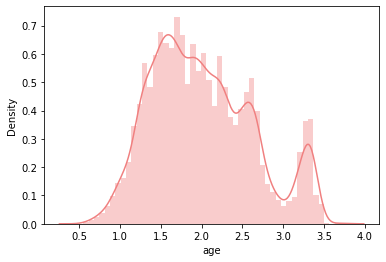

In [109]:
x_train['age'] = np.log(x_train[['age']])
x_valid1['age'] = np.log(x_valid1[['age']])
x_valid2['age'] = np.log(x_valid2[['age']])
sns.distplot(x_train['age'],color="lightcoral")
np.std(x_train['age'])

#### Log transformation is capable of dealing with large numbers and can still make the distribution normal thus helping in outlier treatment

In [110]:
sc1 = StandardScaler()
x_train['avg_training_score'] = sc1.fit_transform(x_train[['avg_training_score']])
x_valid1['avg_training_score'] = sc1.transform(x_valid1[['avg_training_score']])
x_valid2['avg_training_score'] = sc1.transform(x_valid2[['avg_training_score']])

# Feature Selection

In [111]:
# sbs = SequentialFeatureSelector(RandomForestClassifier(), 
#            k_features=(6,13), 
#            forward=True, 
#            floating=False,
#            scoring='accuracy',
#            n_jobs=-1,
#            cv=2)

# # fit the object to our training data.
# sbs = sbs.fit(x_train, y_train)

# # print the selected features. 
# selected_features = x_train.columns[list(sbs.k_feature_idx_)]
# print(selected_features)

# # print the final prediction score.
# print(sbs.k_score_)

In [112]:
# sbs = SequentialFeatureSelector(RandomForestClassifier(), 
#            k_features=(6,13), 
#            forward=False, 
#            floating=False,
#            scoring='accuracy',
#            cv=2)

# # fit the object to our training data.
# sbs = sbs.fit(x_train, y_train)

# # print the selected features. 
# selected_features = x_train.columns[list(sbs.k_feature_idx_)]
# print(selected_features)

# # print the final prediction score.
# print(sbs.k_score_)

[2.70228985e-02 2.12873810e-01 6.42325237e-02 4.98235318e-02
 3.05477218e-02 3.15718744e-01 1.16618708e-02 7.42219402e-03
 4.44064696e-03 2.90833086e-03 1.81495754e-02 1.16199890e-02
 5.05261918e-03 2.20048218e-02 9.70467226e-03 2.80237980e-03
 2.60279902e-03 3.74227388e-03 1.88905969e-03 7.04449988e-03
 2.96076743e-03 6.60373841e-03 4.37046171e-03 3.95361002e-03
 9.05478973e-06 2.86557018e-03 1.15776567e-02 3.08972231e-03
 1.66702199e-03 8.71840199e-03 4.98783709e-03 1.53263335e-03
 3.67117199e-03 5.33370705e-03 5.13524849e-03 4.59059043e-03
 2.61400710e-03 2.21752585e-03 2.99740979e-03 4.54932581e-03
 1.99373104e-03 9.72027381e-04 5.72891546e-04 5.37914226e-03
 1.97440863e-03 1.73056328e-03 9.24400461e-03 2.79025935e-03
 9.50977010e-04 7.65245978e-03 1.61259423e-03 7.58807019e-03
 1.27047655e-02 1.29345904e-02 1.62048027e-02 4.55236319e-03
 1.64319243e-02]


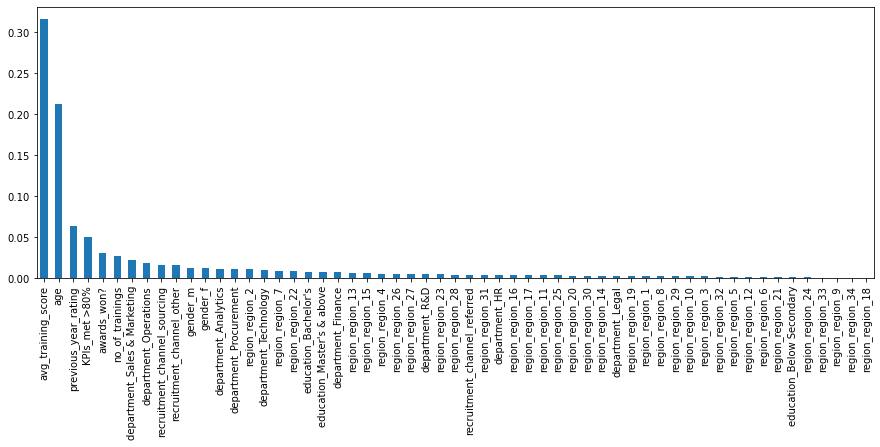

In [113]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.show()

In [114]:
feat_importances.sort_values(ascending=False).index

Index(['avg_training_score', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'no_of_trainings', 'department_Sales & Marketing',
       'department_Operations', 'recruitment_channel_sourcing',
       'recruitment_channel_other', 'gender_m', 'gender_f',
       'department_Analytics', 'department_Procurement', 'region_region_2',
       'department_Technology', 'region_region_7', 'region_region_22',
       'education_Bachelor's', 'education_Master's & above',
       'department_Finance', 'region_region_13', 'region_region_15',
       'region_region_4', 'region_region_26', 'region_region_27',
       'department_R&D', 'region_region_23', 'region_region_28',
       'recruitment_channel_referred', 'region_region_31', 'department_HR',
       'region_region_16', 'region_region_17', 'region_region_11',
       'region_region_25', 'region_region_20', 'region_region_30',
       'region_region_14', 'department_Legal', 'region_region_19',
       'region_region_1', 'region_region_

In [186]:
x_train1 = x_train[['avg_training_score', 'previous_year_rating', 'age', 'KPIs_met >80%','awards_won?',
       'recruitment_channel_sourcing', 'recruitment_channel_other', 'gender_m',
       'region_region_2', 'gender_f', 'no_of_trainings',
       'education_Master\'s & above', 'department_Operations',
       'education_Bachelor\'s', 'department_Sales & Marketing',
       'department_Procurement', 'region_region_22', 'region_region_7',
       'department_Technology', 'department_Analytics', 'region_region_15',
       'region_region_13', 'region_region_26', 'region_region_31',
       'recruitment_channel_referred', 'department_Finance', 'department_HR']]

x_test1 = x_valid1[['avg_training_score', 'previous_year_rating', 'age', 'KPIs_met >80%','awards_won?',
       'recruitment_channel_sourcing', 'recruitment_channel_other', 'gender_m',
       'region_region_2', 'gender_f', 'no_of_trainings',
       'education_Master\'s & above', 'department_Operations',
       'education_Bachelor\'s', 'department_Sales & Marketing',
       'department_Procurement', 'region_region_22', 'region_region_7',
       'department_Technology', 'department_Analytics', 'region_region_15',
       'region_region_13', 'region_region_26', 'region_region_31',
       'recruitment_channel_referred', 'department_Finance', 'department_HR']]

x_test2 = x_valid2[['avg_training_score', 'previous_year_rating', 'age', 'KPIs_met >80%','awards_won?',
       'recruitment_channel_sourcing', 'recruitment_channel_other', 'gender_m',
       'region_region_2','gender_f', 'no_of_trainings',
       'education_Master\'s & above', 'department_Operations',
       'education_Bachelor\'s', 'department_Sales & Marketing',
       'department_Procurement', 'region_region_22', 'region_region_7',
       'department_Technology', 'department_Analytics', 'region_region_15',
       'region_region_13', 'region_region_26', 'region_region_31',
       'recruitment_channel_referred', 'department_Finance', 'department_HR']]


# Finding algorithms which perform good with given training sets
### Will help in choosing the algorithms for level2 modeling
### Using 3 different evaluation techniques for model evaluation

In [116]:
Accuracy = []
Algorithm_valid = []
RMSE = []
F1 = []

In [117]:
def model_eval(df1,df2):
    print("Accuracy: ",accuracy_score(df1,df2))
    print("F1 Score: ",f1_score(df1,df2))
    print("Confusion Matrix:\n",confusion_matrix(df1,df2))
    print("Classification Report:\n",classification_report(df1,df2))

In [118]:
Algorithm_valid.append('LR')
lr = LogisticRegression()
lr.fit(x_train1,y_train)
pred_lr = lr.predict(x_test1)
model_eval(y_valid1,pred_lr)
Accuracy.append(accuracy_score(y_valid1,pred_lr))
RMSE.append(mean_squared_error(y_valid1,pred_lr,squared=False))
F1.append(f1_score(y_valid1,pred_lr))

Accuracy:  0.935126582278481
F1 Score:  0.3751465416178194
Confusion Matrix:
 [[7523   40]
 [ 493  160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7563
           1       0.80      0.25      0.38       653

    accuracy                           0.94      8216
   macro avg       0.87      0.62      0.67      8216
weighted avg       0.93      0.94      0.92      8216



In [119]:
Algorithm_valid.append('DT')
dt = DecisionTreeClassifier()
dt.fit(x_train1,y_train)
pred_dt = dt.predict(x_test1)
model_eval(y_valid1,pred_dt)
Accuracy.append(accuracy_score(y_valid1,pred_dt))
RMSE.append(mean_squared_error(y_valid1,pred_dt,squared=False))
F1.append(f1_score(y_valid1,pred_dt))

Accuracy:  0.8972736124634859
F1 Score:  0.39105339105339104
Confusion Matrix:
 [[7101  462]
 [ 382  271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7563
           1       0.37      0.42      0.39       653

    accuracy                           0.90      8216
   macro avg       0.66      0.68      0.67      8216
weighted avg       0.90      0.90      0.90      8216



In [120]:
Algorithm_valid.append('RF')
rf = RandomForestClassifier()
rf.fit(x_train1,y_train)
pred_rf = rf.predict(x_test1)
model_eval(y_valid1,pred_rf)
Accuracy.append(accuracy_score(y_valid1,pred_rf))
RMSE.append(mean_squared_error(y_valid1,pred_rf,squared=False))
F1.append(f1_score(y_valid1,pred_rf))

Accuracy:  0.9363437195715677
F1 Score:  0.4500525762355415
Confusion Matrix:
 [[7479   84]
 [ 439  214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7563
           1       0.72      0.33      0.45       653

    accuracy                           0.94      8216
   macro avg       0.83      0.66      0.71      8216
weighted avg       0.93      0.94      0.93      8216



In [121]:
Algorithm_valid.append('NB')
nb = GaussianNB()
nb.fit(x_train1,y_train)
pred_nb = nb.predict(x_test1)
model_eval(y_valid1,pred_nb)
Accuracy.append(accuracy_score(y_valid1,pred_nb))
RMSE.append(mean_squared_error(y_valid1,pred_nb,squared=False))
F1.append(f1_score(y_valid1,pred_nb))

Accuracy:  0.8898490749756572
F1 Score:  0.24140821458507963
Confusion Matrix:
 [[7167  396]
 [ 509  144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7563
           1       0.27      0.22      0.24       653

    accuracy                           0.89      8216
   macro avg       0.60      0.58      0.59      8216
weighted avg       0.88      0.89      0.89      8216



In [122]:
Algorithm_valid.append('SVC')
svc = SVC(kernel = 'rbf')
svc.fit(x_train1,y_train)
pred_svc = svc.predict(x_test1)
model_eval(y_valid1,pred_svc)
Accuracy.append(accuracy_score(y_valid1,pred_svc))
RMSE.append(mean_squared_error(y_valid1,pred_svc,squared=False))
F1.append(f1_score(y_valid1,pred_svc))

Accuracy:  0.9323271665043817
F1 Score:  0.2625994694960212
Confusion Matrix:
 [[7561    2]
 [ 554   99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7563
           1       0.98      0.15      0.26       653

    accuracy                           0.93      8216
   macro avg       0.96      0.58      0.61      8216
weighted avg       0.94      0.93      0.91      8216



In [123]:
Algorithm_valid.append('XGB')
xgb = XGBClassifier()
xgb.fit(x_train1,y_train)
pred_xgb = xgb.predict(x_test1)
model_eval(y_valid1,pred_xgb)
Accuracy.append(accuracy_score(y_valid1,pred_xgb))
RMSE.append(mean_squared_error(y_valid1,pred_xgb,squared=False))
F1.append(f1_score(y_valid1,pred_xgb))

[11:07:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.9442551119766309
F1 Score:  0.49448123620309054
Confusion Matrix:
 [[7534   29]
 [ 429  224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7563
           1       0.89      0.34      0.49       653

    accuracy                           0.94      8216
   macro avg       0.92      0.67      0.73      8216
weighted avg       0.94      0.94      0.93      8216



In [124]:
Algorithm_valid.append('KNN')
knn = KNeighborsClassifier()
knn.fit(x_train1,y_train)
pred_knn = knn.predict(x_test1)
model_eval(y_valid1,pred_knn)
Accuracy.append(accuracy_score(y_valid1,pred_knn))
RMSE.append(mean_squared_error(y_valid1,pred_knn,squared=False))
F1.append(f1_score(y_valid1,pred_knn))

Accuracy:  0.9239289191820838
F1 Score:  0.23500611995104043
Confusion Matrix:
 [[7495   68]
 [ 557   96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7563
           1       0.59      0.15      0.24       653

    accuracy                           0.92      8216
   macro avg       0.76      0.57      0.60      8216
weighted avg       0.90      0.92      0.90      8216



In [125]:
Algorithm_valid.append('Light GBM')
lgbm = LGBMClassifier()
lgbm.fit(x_train1,y_train)
pred_lgbm = lgbm.predict(x_test1)
model_eval(y_valid1,pred_lgbm)
Accuracy.append(accuracy_score(y_valid1,pred_lgbm))
RMSE.append(mean_squared_error(y_valid1,pred_lgbm,squared=False))
F1.append(f1_score(y_valid1,pred_lgbm))

Accuracy:  0.946080817916261
F1 Score:  0.5083240843507214
Confusion Matrix:
 [[7544   19]
 [ 424  229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7563
           1       0.92      0.35      0.51       653

    accuracy                           0.95      8216
   macro avg       0.94      0.67      0.74      8216
weighted avg       0.94      0.95      0.93      8216



In [126]:
Algorithm_valid.append('ADA')
ada = AdaBoostClassifier()
ada.fit(x_train1,y_train)
pred_ada = ada.predict(x_test1)
model_eval(y_valid1,pred_ada)
Accuracy.append(accuracy_score(y_valid1,pred_ada))
RMSE.append(mean_squared_error(y_valid1,pred_ada,squared=False))
F1.append(f1_score(y_valid1,pred_ada))

Accuracy:  0.9302580331061344
F1 Score:  0.3054545454545454
Confusion Matrix:
 [[7517   46]
 [ 527  126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7563
           1       0.73      0.19      0.31       653

    accuracy                           0.93      8216
   macro avg       0.83      0.59      0.63      8216
weighted avg       0.92      0.93      0.91      8216



In [127]:
Algorithm_valid.append('Cat')
cat = CatBoostClassifier(silent=True)
cat.fit(x_train1,y_train)
pred_cat = cat.predict(x_test1)
model_eval(y_valid1,pred_cat)
Accuracy.append(accuracy_score(y_valid1,pred_cat))
RMSE.append(mean_squared_error(y_valid1,pred_cat,squared=False))
F1.append(f1_score(y_valid1,pred_cat))

Accuracy:  0.9452288218111002
F1 Score:  0.5044052863436123
Confusion Matrix:
 [[7537   26]
 [ 424  229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      7563
           1       0.90      0.35      0.50       653

    accuracy                           0.95      8216
   macro avg       0.92      0.67      0.74      8216
weighted avg       0.94      0.95      0.93      8216



In [128]:
Algorithm_valid.append('LDA')
lda = LinearDiscriminantAnalysis()
lda.fit(x_train1, y_train)
pred_lda = lda.predict(x_test1)
model_eval(y_valid1,pred_lda)
Accuracy.append(accuracy_score(y_valid1,pred_lda))
RMSE.append(mean_squared_error(y_valid1,pred_lda,squared=False))
F1.append(f1_score(y_valid1,pred_lda))

Accuracy:  0.9277020447906524
F1 Score:  0.3626609442060086
Confusion Matrix:
 [[7453  110]
 [ 484  169]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      7563
           1       0.61      0.26      0.36       653

    accuracy                           0.93      8216
   macro avg       0.77      0.62      0.66      8216
weighted avg       0.91      0.93      0.91      8216



In [129]:
Comparison = pd.DataFrame(list(zip(Algorithm_valid, Accuracy,RMSE,F1)), columns = ['Algorithm_valid', 'Accuracy','RMSE','F1'])
Comparison.sort_values(by='F1',ascending=False)

,Algorithm_valid,Accuracy,RMSE,F1
7,Light GBM,0.946081,0.232205,0.508324
9,Cat,0.945229,0.234032,0.504405
5,XGB,0.944255,0.236104,0.494481
2,RF,0.936344,0.252302,0.450053
1,DT,0.897274,0.320510,0.391053
0,LR,0.935127,0.254703,0.375147
10,LDA,0.927702,0.268883,0.362661
8,ADA,0.930258,0.264087,0.305455
4,SVC,0.932327,0.260140,0.262599
3,NB,0.889849,0.331890,0.241408


In [130]:
# param_rf = {
#             'n_estimators': [100,200,300,500],
#             'max_depth': [7,8,9,10,None],
#            }
# rftest = RandomForestClassifier()
# rfrandom = RandomizedSearchCV(rftest,param_rf, cv=3,n_jobs)
# rfrandom.fit(x_train,y_train)
# print(rfrandom.best_params_)

In [131]:
# param_lgbm = {
#      'n_estimators': [100,200,300,500],
#      'learning_rate':[0.01,0.1,1]
#      'max_depth':[7,8,9,10,None]
#     }
# lgb_model = LGBMClassifier()
# lsearch = RandomizedSearchCV(lgb_model, params,
#                     verbose=True,
#                     cv = 3,
#                     n_jobs=-1)
# xsearch.fit(x_train,y_train)
# print(lsearch.best_params_)

# Preparing Final Custom Model

In [252]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',[0,1], y)
weights

array([0.54654966, 5.8706084 ])

In [253]:
weight_class = {0:weights[0],1:weights[1]}

In [254]:
print('*'*30,'RF','*'*30)
rf_new = RandomForestClassifier(n_estimators=500,max_depth=None,bootstrap=True,class_weight=weight_class)
rf_new.fit(x_train1,y_train)
predr_new = rf_new.predict(x_test1)
model_eval(y_valid1,predr_new)

print('*'*30,'LGBM','*'*30)
lgb_new = LGBMClassifier(max_depth=8,n_estimators=500,class_weight=weight_class)
lgb_new.fit(x_train1,y_train)
predl_new = lgb_new.predict(x_test1)
model_eval(y_valid1,predl_new)

print('*'*30,'CAT','*'*30)
cat_new = CatBoostClassifier(silent=True)
cat_new.fit(x_train1,y_train)
predc_new = cat_new.predict(x_test1)
model_eval(y_valid1,predc_new)

print('*'*30,'LR','*'*30)
lr_new = LogisticRegression(class_weight=weight_class)
lr_new.fit(x_train1,y_train)
predlr_new = lr_new.predict(x_test1)
model_eval(y_valid1,predlr_new)

****************************** RF ******************************
Accuracy:  0.9367088607594937
F1 Score:  0.4456289978678038
Confusion Matrix:
 [[7487   76]
 [ 444  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      7563
           1       0.73      0.32      0.45       653

    accuracy                           0.94      8216
   macro avg       0.84      0.66      0.71      8216
weighted avg       0.93      0.94      0.93      8216

****************************** LGBM ******************************
Accuracy:  0.8344693281402142
F1 Score:  0.38572719060523936
Confusion Matrix:
 [[6429 1134]
 [ 226  427]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      7563
           1       0.27      0.65      0.39       653

    accuracy                           0.83      8216
   macro avg       0.62      0.75      0.65      8216
weighted

In [255]:
final_models = [('cat',cat_new),('lgb',lgb_new),('rf',rf_new),('xg',xgb_new)]
ensemble1 = StackingClassifier(estimators=final_models,passthrough=True)
ensemble1.fit(x_train1,y_train)

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x000001C2D9007910>),
                               ('lgb',
                                LGBMClassifier(class_weight={0: 0.5465496609493419,
                                                             1: 5.8706083976006855},
                                               max_depth=8, n_estimators=500)),
                               ('rf',
                                RandomForestClassifier(class_weight={0: 0.5465496609493419,
                                                                     1: 5.8706083976006855},
                                                       n_estimators=500)),
                               ('xg',
                                XGBClassifier(base_score=0.5,...
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                   

In [256]:
new_pred = ensemble1.predict(x_test1)
model_eval(y_valid1,new_pred)

Accuracy:  0.9434031158714703
F1 Score:  0.49946178686759957
Confusion Matrix:
 [[7519   44]
 [ 421  232]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7563
           1       0.84      0.36      0.50       653

    accuracy                           0.94      8216
   macro avg       0.89      0.67      0.73      8216
weighted avg       0.94      0.94      0.93      8216



In [257]:
new_pred2 = ensemble1.predict(x_test2)
model_eval(y_valid2,new_pred2)

Accuracy:  0.9424993921711646
F1 Score:  0.5118679050567595
Confusion Matrix:
 [[7505   41]
 [ 432  248]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7546
           1       0.86      0.36      0.51       680

    accuracy                           0.94      8226
   macro avg       0.90      0.68      0.74      8226
weighted avg       0.94      0.94      0.93      8226



In [241]:
predict_data = pd.read_csv('test.csv')

In [242]:
pred_x = predict_data.drop(['employee_id'],axis=1)

In [243]:
pred_x['previous_year_rating'].fillna(1,inplace=True)
pred_x['education'].fillna(pred_x['education'].mode()[0], inplace=True)

In [244]:
pred_x = pd.get_dummies(pred_x)
pred_x['age'] = pred_x['age']/pred_x['length_of_service']
pred_x = pred_x.drop(['length_of_service'],axis=1)
pred_x['age'] = np.log(pred_x[['age']])
pred_x['avg_training_score'] = sc1.transform(pred_x[['avg_training_score']])

In [245]:
pred_x.head()

,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.178054,1.0,1,0,1.021264,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,1.824549,3.0,0,0,-0.926907,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1,2.047693,1.0,0,0,-1.226626,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,1.236763,2.0,0,0,0.122108,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,1.455287,4.0,0,0,-0.177611,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [246]:
pred_x = pred_x[['avg_training_score', 'previous_year_rating', 'age', 'KPIs_met >80%','awards_won?',
       'recruitment_channel_sourcing', 'recruitment_channel_other', 'gender_m',
       'region_region_2','gender_f', 'no_of_trainings',
       'education_Master\'s & above', 'department_Operations',
       'education_Bachelor\'s', 'department_Sales & Marketing',
       'department_Procurement', 'region_region_22', 'region_region_7',
       'department_Technology', 'department_Analytics', 'region_region_15',
       'region_region_13', 'region_region_26', 'region_region_31',
       'recruitment_channel_referred', 'department_Finance', 'department_HR']]

In [247]:
pred_x.head()

,avg_training_score,previous_year_rating,age,KPIs_met >80%,awards_won?,recruitment_channel_sourcing,recruitment_channel_other,gender_m,region_region_2,gender_f,...,region_region_7,department_Technology,department_Analytics,region_region_15,region_region_13,region_region_26,region_region_31,recruitment_channel_referred,department_Finance,department_HR
0,1.021264,1.0,3.178054,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,-0.926907,3.0,1.824549,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-1.226626,1.0,2.047693,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.122108,2.0,1.236763,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.177611,4.0,1.455287,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [259]:
final_prediction = ensemble1.predict(pred_x)

In [260]:
final_prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [261]:
predict_data['is_promoted'] = final_prediction
predict_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,0


## The final predictions have been stored back in the test data for which the predictions were to be made